                          noted_date          temp
count                          97606  97606.000000
mean   2018-10-07 05:10:38.821178880     35.053931
min              2018-07-28 07:06:00     21.000000
25%              2018-09-11 07:48:00     30.000000
50%              2018-10-17 05:10:00     35.000000
75%              2018-10-18 13:46:00     40.000000
max              2018-12-08 09:30:00     51.000000
std                              NaN      5.699825


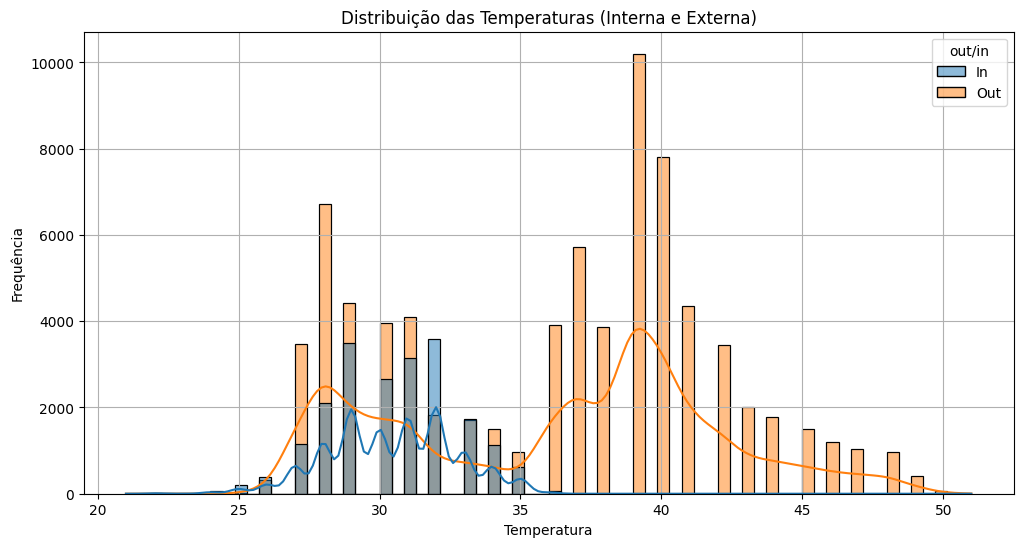

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar dados
data = pd.read_csv('../../data/dataset/IOT-temp.csv')

# Conversão da coluna 'noted_date' para datetime
data['noted_date'] = pd.to_datetime(data['noted_date'], format='%d-%m-%Y %H:%M')

# Análise exploratória básica
print(data.describe())

# Plotar a distribuição das temperaturas
plt.figure(figsize=(12, 6))
sns.histplot(data=data, x='temp', hue='out/in', kde=True)
plt.title('Distribuição das Temperaturas (Interna e Externa)')
plt.xlabel('Temperatura')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Adicionar características temporais
data['hour'] = data['noted_date'].dt.hour
data['day'] = data['noted_date'].dt.day
data['month'] = data['noted_date'].dt.month
data['year'] = data['noted_date'].dt.year

# Converter 'out/in' para valores numéricos
data['out/in'] = data['out/in'].map({'In': 0, 'Out': 1})

# Selecionar características e alvo
X = data[['hour', 'day', 'month', 'year', 'out/in']]
y = data['temp']

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar o modelo Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Salvar o modelo treinado (opcional)
import joblib
joblib.dump(rf, 'random_forest_model.pkl')


['random_forest_model.pkl']

In [7]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import joblib
# Carregar o modelo treinado (se necessário)
rf = joblib.load('random_forest_model.pkl')

# Previsões e avaliação do modelo
y_pred = rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'MSE: {mse}')
print(f'MAE: {mae}')

# Exemplo de previsão com dados de teste
sample_test_data = X_test.sample(n=10, random_state=42)
sample_predictions = rf.predict(sample_test_data)
print(sample_predictions)
print(rf)

MSE: 0.5087924034971992
MAE: 0.5081061431933304
[28.57183781 38.09091399 39.75050222 48.02898747 41.51520242 29.08884798
 38.91027187 39.46805397 38.98477566 38.99175369]
RandomForestRegressor(random_state=42)
